In [1]:
import numpy as np
import os

**Data preparation**
- Read all trec files
- Lower case
- Make all queries unique
- Filter if miswritten word ?
- Save to CSV miswritten and source within single file

In [2]:
query_file='/Users/math/Datasets/text/searchQueries/trec/trec-utf8'
query_min_length = 10
val_split = 0.1

Nb unique queries:  49806


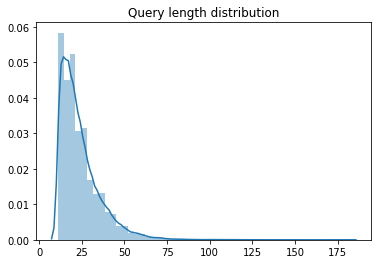

Text(0.5, 1.0, 'Token length distribution')

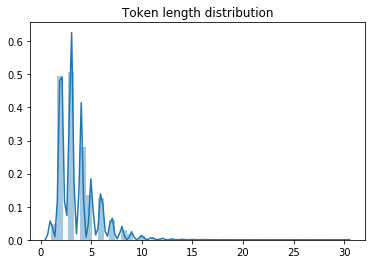

In [3]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

with open(query_file, encoding="utf8") as file_reader:
    raw_queries = file_reader.readlines()

queries = []
    
for raw_query in raw_queries:
    index = raw_query.rindex(':')
    query = raw_query[index+1:].lower()
    query = query.replace('\n','')
    
    if len(query) > query_min_length:
        queries.append(query)

queries = np.unique(queries)
random.shuffle(queries)

print("Nb unique queries: ",len(queries))

sns.distplot(list(map(lambda x: len(x), queries))).set_title("Query length distribution")
plt.show()
sns.distplot(list(map(lambda x: len(x.split(' ')), queries))).set_title("Token length distribution")


**Input generation**
foreach queries: add, remove or replace randomely 1 or two caracters

In [4]:
def get_random_char():
    return random.choice('abcdefghijklmnopqrstuvwxyz')

def alter(query):
    alter_count = random.randint(1,2)
    alter_mode = random.randint(1,3)
    char_query = list(query)
    
    for _ in range(alter_count):
        alter_pos = random.randint(0,len(char_query)-1)
        #ADD
        if alter_mode == 1:
            char_query.insert(alter_pos,get_random_char())
        #REMOVE
        elif alter_mode == 2:
            del char_query[alter_pos]
        #UPDATE
        else:
            char_query[alter_pos] = get_random_char()
    
    return "".join(char_query)


test = queries[100]
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))

provo air traffic control tower provo air traffic cintrol tywer
provo air traffic control tower provo asir traffic countrol tower
provo air traffic control tower provo ir traffic control tower
provo air traffic control tower prohvo air trafmfic control tower
provo air traffic control tower provo air traffic coktrol tower


In [5]:
altered_queries = list(map(lambda q: alter(q), queries))

for idx in range(10):
    print("%s %s" % (altered_queries[idx],queries[idx]))

set kp po fail syndrome set up to fail syndrome
variocosenveins variocose veins
laws of federal food rug and cosmetic act laws of federal food drug and cosmetic act
foqod caklories food calories
precampsi preclampsia
do kit yourself do it yourself
1968 panemic 1968 pandemic
wa socialsecrity wa social security
il tollroads il toll roads
lightalarms electrnics corportion lightalarms electronics corporation


In [6]:
pivot_split = int(len(queries)*val_split)

x_val = altered_queries[0:pivot_split]
y_val = queries[0:pivot_split]
x_train = altered_queries[pivot_split:]
y_train = queries[pivot_split:]
x_test = [
"gong to china",
"who ws the first president of india",
"winr of the match",
"fod in america",
"best plcs to visit in malaysia",
"scholng in usa",
"us univsity rankings",
"visit to the bank to open an accnt",
"travelng to dubai",
"ancing in the dark",
"let's visit an apple orchrd",
"trip to th zoo",
"presidentc of the world",
"kurent presidents of the world",
"how to looze weight",
"how to lose fat",
"how to multiply mony",
"how to multiply money in short tem",
"investing in stok maket",
"plane taking off from watr",
"sailing tims",
"flight landin time ",
"which direction we shld sleep",
"nearby restarnts",
"goingto india",
"gongto china"
]
y_test = [
 "going to china",
 "who was the first president of india",
 "winner of the match",
 "food in america",
 "best places to visit in malaysia",
 "schooling in usa",
 "us university rankings",
 "visit to the bank to open an account",
 "traveling to dubai",
 "dancing in the dark",
 "let's visit an apple orchard",
 "trip to the zoo",
 "presidents of the world",
 "current presidents of the world",
 "how to lose weight",
 "how to lose fat",
 "how to multiply money",
 "how to multiply money in short term",
 "investing in stock market",
 "plane taking off from water",
 "sailing times",
 "flight landing time",
 "which direction we should sleep",
 "nearby restaurants",
 "going to india",
 "going to china"]

print("Train size ",len(x_train))
print("Validation size ",len(x_val))
print("Test size ",len(x_test))

Train size  44826
Validation size  4980
Test size  26


**Char based model**
- Convert sequences to index,
- Convert to categories,
- Pad sequences
Model:
- Bi directionnal lstm
- Single FCL output


In [7]:
#Intra model parameters
import itertools


max_char = max(list(map(lambda q: len(list(q)), queries)))
truncating = 'post'
padding_mode = 'post'

chars = np.unique(list(itertools.chain.from_iterable(queries)))
vocab_size = len(chars)

idx_to_char = { i+1 : chars[i] for i in range(0, len(chars) ) }
char_to_idx = { v : k for k,v in idx_to_char.items()}

print("Max length: ",max_char)
print("Vocab size: ",vocab_size)
print("Dict: ",idx_to_char)

Max length:  182
Vocab size:  59
Dict:  {1: ' ', 2: '"', 3: '&', 4: "'", 5: '(', 6: ')', 7: '*', 8: '+', 9: ',', 10: '-', 11: '.', 12: '0', 13: '1', 14: '2', 15: '3', 16: '4', 17: '5', 18: '6', 19: '7', 20: '8', 21: '9', 22: ';', 23: '?', 24: 'a', 25: 'b', 26: 'c', 27: 'd', 28: 'e', 29: 'f', 30: 'g', 31: 'h', 32: 'i', 33: 'j', 34: 'k', 35: 'l', 36: 'm', 37: 'n', 38: 'o', 39: 'p', 40: 'q', 41: 'r', 42: 's', 43: 't', 44: 'u', 45: 'v', 46: 'w', 47: 'x', 48: 'y', 49: 'z', 50: '§', 51: '©', 52: 'ª', 53: '®', 54: '¶', 55: 'â', 56: 'ã', 57: 'í', 58: 'ñ', 59: 'ó'}


In [9]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

def to_padded_sequencies(queries):
    
    idx_queries = []
    
    for query in queries:
        idx_queries.append(list(map(lambda c: char_to_idx[c] ,list(query))))
    
    padded = pad_sequences(idx_queries,maxlen=max_char,padding=padding_mode,truncating=truncating)
    padded = to_categorical(padded,num_classes = vocab_size + 1)
    #padded = padded / vocab_size
    #padded = padded.reshape((padded.shape[0],padded.shape[1],1))
    
    
    print(padded.shape)
    
    return padded
    
    

x_train_pad = to_padded_sequencies(x_train)
y_train_pad = to_padded_sequencies(y_train)
x_val_pad = to_padded_sequencies(x_val)
y_val_pad = to_padded_sequencies(y_val)
x_test_pad = to_padded_sequencies(x_test)
y_test_pad = to_padded_sequencies(y_test)

(44826, 182, 60)
(44826, 182, 60)
(4980, 182, 60)
(4980, 182, 60)
(26, 182, 60)
(26, 182, 60)


In [38]:
import tensorflow as tf
from tensorflow import keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

print(tf.__version__)

print(x_train_pad.shape)

model = keras.Sequential([
    #keras.layers.Lambda(lambda char_seq: tf.expand_dims(char_seq, axis=-1), input_shape=[max_char,vocab_size+1]),
    #keras.layers.Bidirectional(keras.layers.LSTM(vocab_size+1,return_sequences=True))
    keras.layers.Bidirectional(keras.layers.LSTM(vocab_size+1,return_sequences=True),input_shape=[max_char,vocab_size+1]),
    keras.layers.LSTM(vocab_size+1,return_sequences=True,activation=tf.nn.sigmoid)
])

model.summary()

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 10
model.fit(
    x_train_pad,
    y_train_pad,
    epochs=epochs,
    validation_data=(x_test_pad,y_test_pad)
)



2.0.0
(44826, 182, 60)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 182, 120)          58080     
_________________________________________________________________
lstm_5 (LSTM)                (None, 182, 60)           43440     
Total params: 101,520
Trainable params: 101,520
Non-trainable params: 0
_________________________________________________________________
Train on 44826 samples, validate on 26 samples
Epoch 1/10
   32/44826 [..............................] - ETA: 3:10:57

KeyboardInterrupt: 

In [37]:
def predict(x):
    y_hat = model.predict(x)
    print(y_hat[0,:,:])
    y_hat = np.argmax(y_hat, axis=-1)
    print(y_hat[0,:])
    print(y_hat.shape)
    
    queries_hat = []
    
    for y_single_hat in y_hat:
        idx_null = np.where(y_single_hat == 0)[0]
        if idx_null != 0:
            y_single_hat = y_single_hat[0:idx_null]
        
        queries_hat.append(''.join(map(lambda idx: idx_to_char[idx] ,y_single_hat)))
        
    return queries_hat

print(predict(x_train_pad[0:10,:,:]))

[[ 0.00125387  0.00132594 -0.00236718 ... -0.00872595  0.00309609
   0.00798102]
 [ 0.00121342  0.00605138 -0.00506326 ... -0.01489777  0.00504247
   0.00995231]
 [-0.0030011   0.00727986 -0.01144686 ... -0.02017293 -0.00147541
   0.01026918]
 ...
 [-0.05022187 -0.00060801  0.04647825 ...  0.00984011 -0.10356117
   0.00582609]
 [-0.04713222 -0.00039605  0.04878013 ...  0.01025126 -0.10509059
   0.00498405]
 [-0.04360526 -0.00167356  0.05231305 ...  0.01116109 -0.10630672
   0.00392904]]
[54 54 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':
